In [1]:
import numpy as np
import scipy
import random
import math
import pandas as pd
import itertools as it
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
import string
import networkx as nx

filepath = 'data/'

locations = pd.read_csv(filepath + 'location_csv.csv', delimiter=';', low_memory=False)
#locations = locations.drop(locations.columns[[5]], axis=1)

with open(filepath + 'distance_matrix.txt', 'r') as fobj:
    distances = [[num for num in it.islice(line.split(), 4674, 7530)] for line in it.islice(fobj, 0, 4674)]
distance = np.array(distances)

with open(filepath + 'time_matrix.txt', 'r') as fobj:
    times = [[num for num in it.islice(line.split(), 0, 4674)] for line in it.islice(fobj, 4674, 7530)]
time = np.array(times)

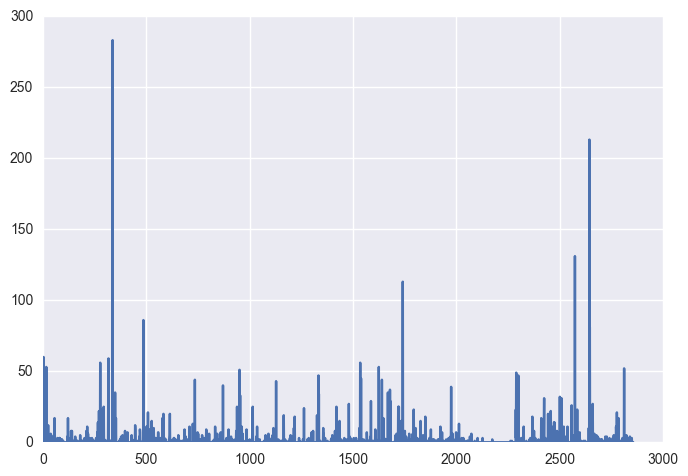

647
4674.0


In [7]:
# distance = pd.DataFrame(distance)
# time = pd.DataFrame(time)
minDistance = np.zeros(2857)
minDict = {}
for num, row in enumerate(time):
    #row = rowRaw.copy()
    #row = np.append(row[0:num], row[num+1:])
    minCity = np.argmin(row)
    minDistance[minCity] = minDistance[minCity] + 1
    minDict[num] = minCity

plt.plot(minDistance)
plt.show()
print(np.count_nonzero(minDistance))
print(sum(minDistance))

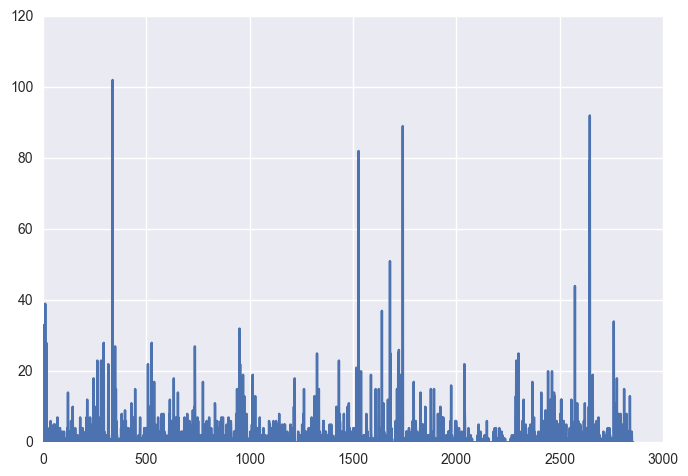

1066
4674.0


In [8]:
# distance = pd.DataFrame(distance)
# time = pd.DataFrame(time)
minDistance = np.zeros(2857)
minDict = {}
for num, row in enumerate(distance):
    #row = rowRaw.copy()
    #row = np.append(row[0:num], row[num+1:])
    minCity = np.argmin(row)
    minDistance[minCity] = minDistance[minCity] + 1
    minDict[num] = minCity

plt.plot(minDistance)
plt.show()
print(np.count_nonzero(minDistance))
print(sum(minDistance))

In [37]:
citiesClosest = [[] for i in range(2858)]
locationsHold = np.zeros(4674)
for num, row in enumerate(time):
    for i, locationTime in enumerate(row):
        if locationsHold[i] != 1 and float(locationTime) <= 0.5 and len(citiesClosest[num]) <= 5000:
            citiesClosest[num].append(i)
            locationsHold[i] = 1

In [38]:
print(np.count_nonzero([len(o) for o in citiesClosest]))

369


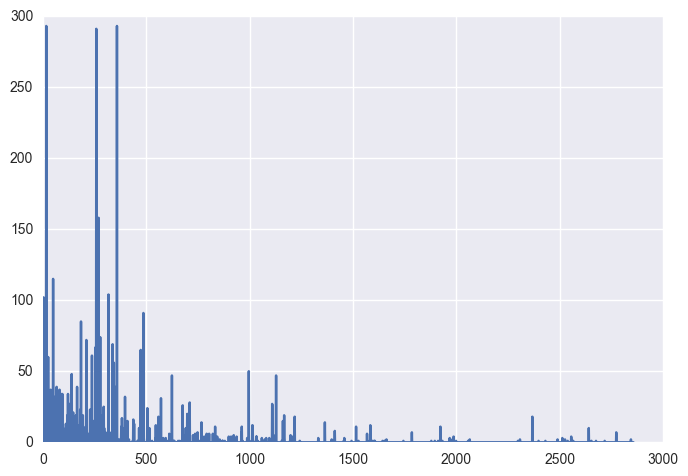

In [39]:
plt.plot([len(i) for i in citiesClosest])
plt.show()

0.25 hours maximum.
507


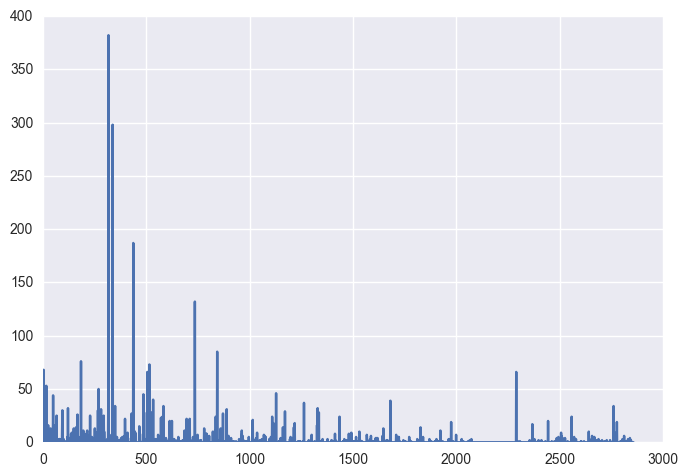

0.5 hours maximum.
369


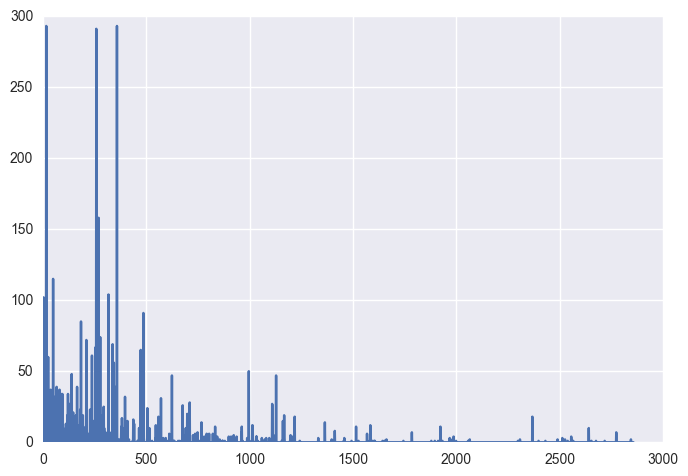

1 hours maximum.
233


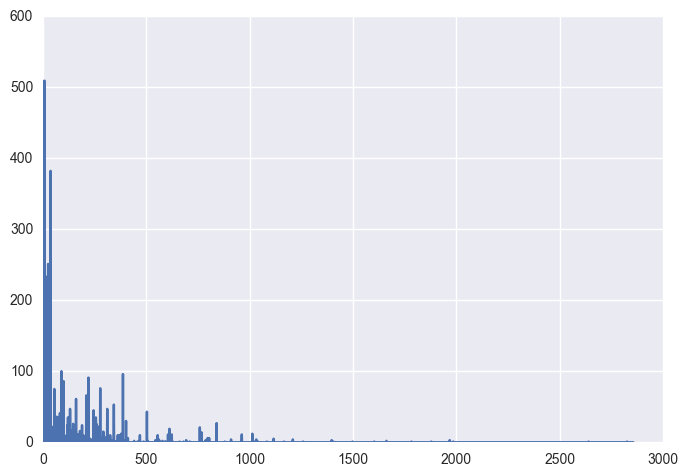

1.5 hours maximum.
147


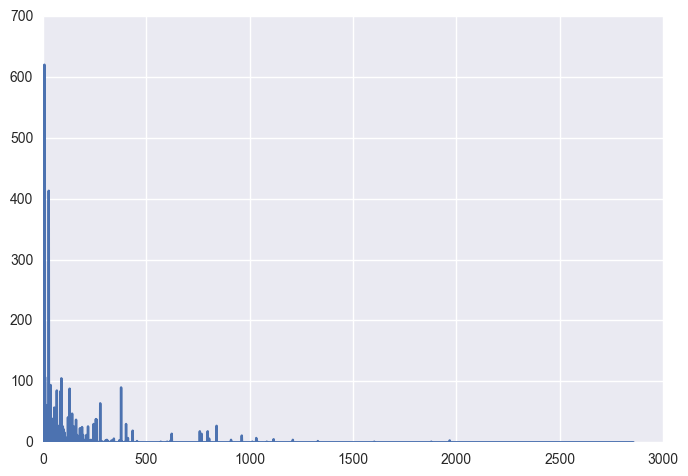

2 hours maximum.
111


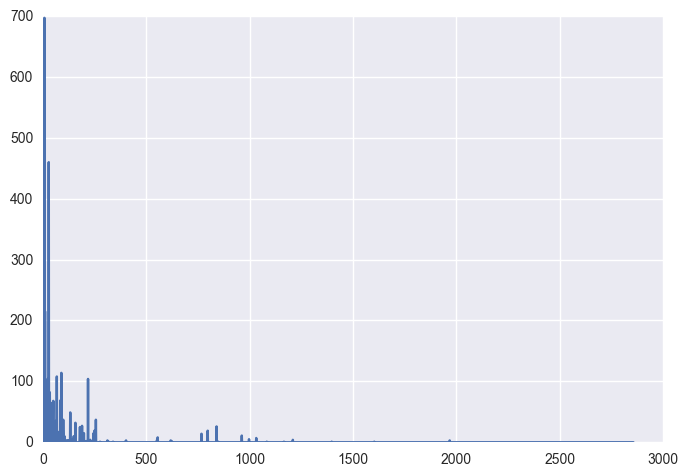

3 hours maximum.
73


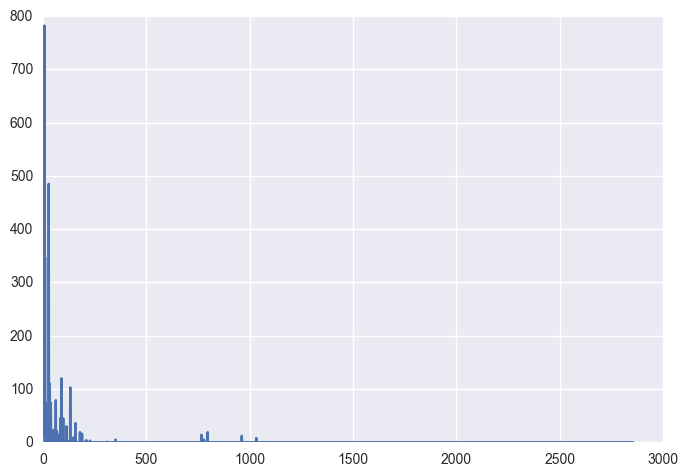

4 hours maximum.
52


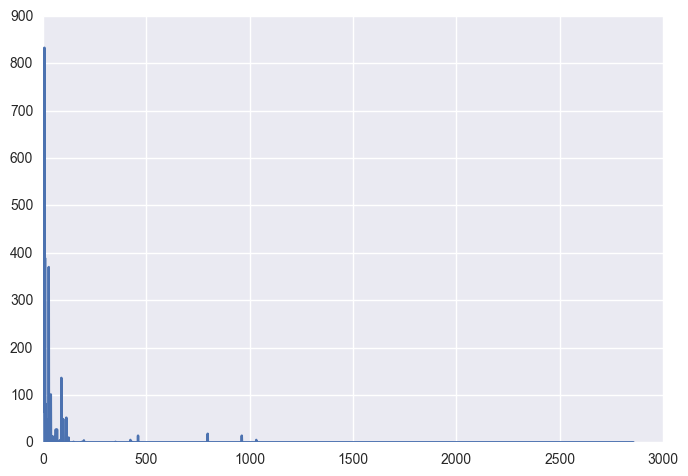

5 hours maximum.
42


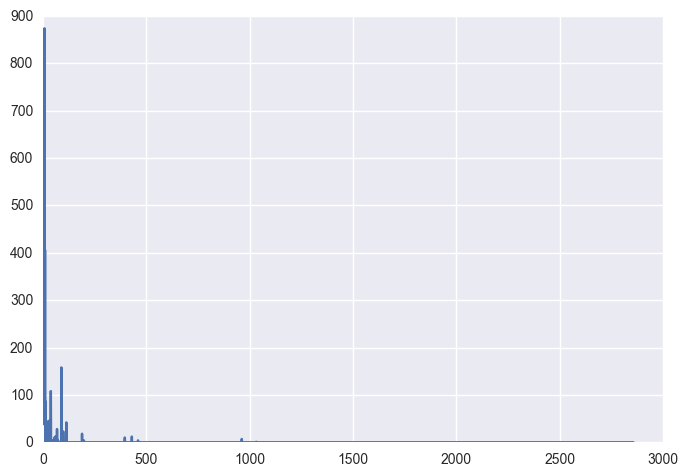

10 hours maximum.
17


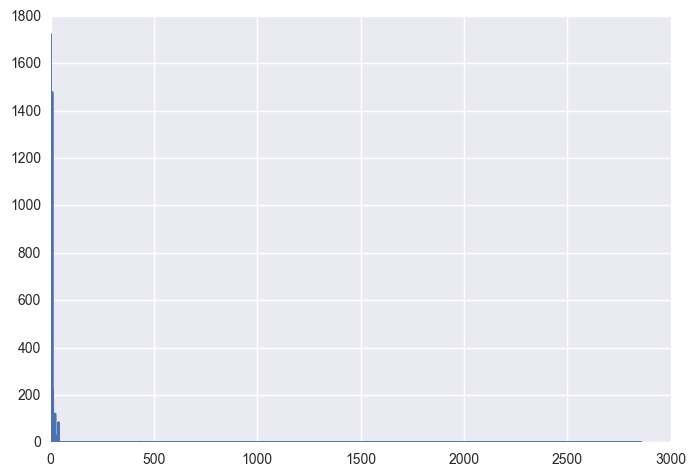

In [3]:
for temp in [0.25,0.5,1,1.5,2,3,4,5,10]:
    print(str(temp) + " hours maximum.")
    citiesClosest = [[] for i in range(2858)]
    locationsHold = np.zeros(4674)
    for num, row in enumerate(time):
        for i, locationTime in enumerate(row):
            if locationsHold[i] != 1 and float(locationTime) <= temp and len(citiesClosest[num]) <= 5000:
                citiesClosest[num].append(i)
                locationsHold[i] = 1
    print(np.count_nonzero([len(o) for o in citiesClosest]))
    plt.plot([len(i) for i in citiesClosest])
    plt.show()